In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("C:\\Users\\DELL I7\\Desktop\\Untitled Folder\\data set\\black friday\\train.csv")
test = pd.read_csv("C:\\Users\\DELL I7\\Desktop\\Untitled Folder\\data set\\black friday\\test.csv")

In [8]:
idsUniqe=len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUniqe
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


# EDA

C:\Users\DELL I7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'purchase amount distribution')

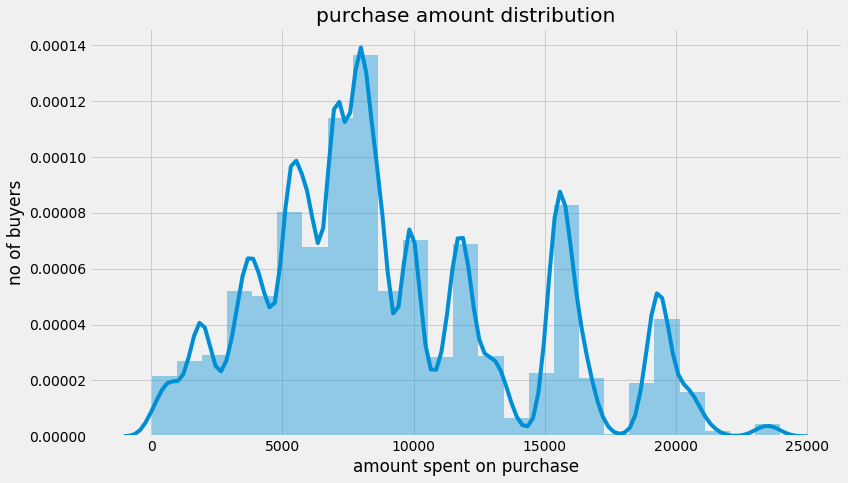

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase,bins = 25)
plt.xlabel("amount spent on purchase")
plt.ylabel("no of buyers")
plt.title("purchase amount distribution")


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [23]:
train.Occupation.value_counts()
#sns.countplot(train.Occupation)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

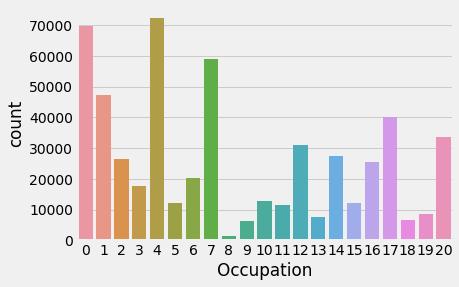

In [24]:
sns.countplot(train.Occupation)

In [25]:
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

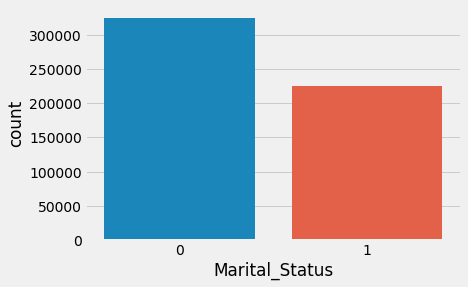

In [26]:
sns.countplot(train.Marital_Status)

In [27]:
train.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

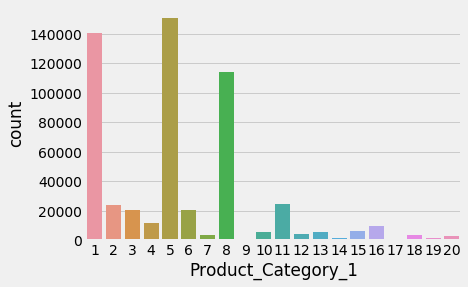

In [29]:
sns.countplot(train.Product_Category_1)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

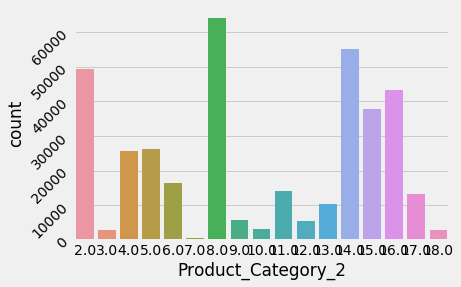

In [32]:
sns.countplot(train.Product_Category_2)
plt.yticks(rotation=45)

In [37]:
# numerical variables
numerical_features = train.select_dtypes(include = [np.number])
numerical_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [42]:
corr=numerical_features.corr()
corr['Purchase']

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

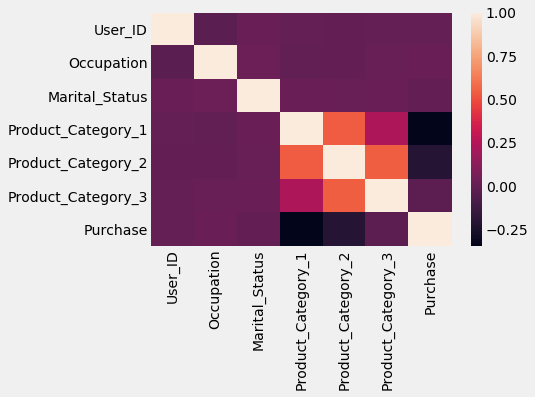

In [43]:
sns.heatmap(corr)

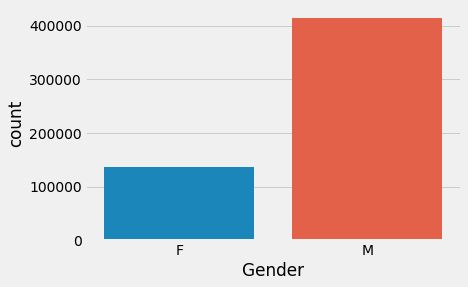

In [44]:
sns.countplot(train.Gender)

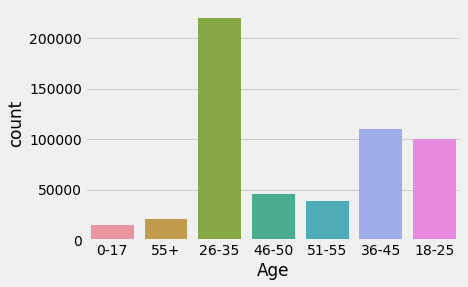

In [47]:
sns.countplot(train.Age)

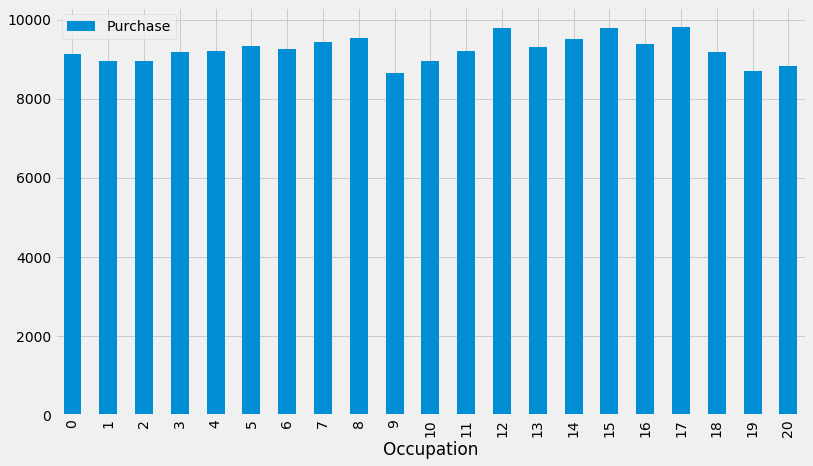

In [55]:
Occupation_pivot=train.pivot_table(index = 'Occupation',values='Purchase',aggfunc=np.mean)
Occupation_pivot.plot(kind = "bar",figsize = (12,7))

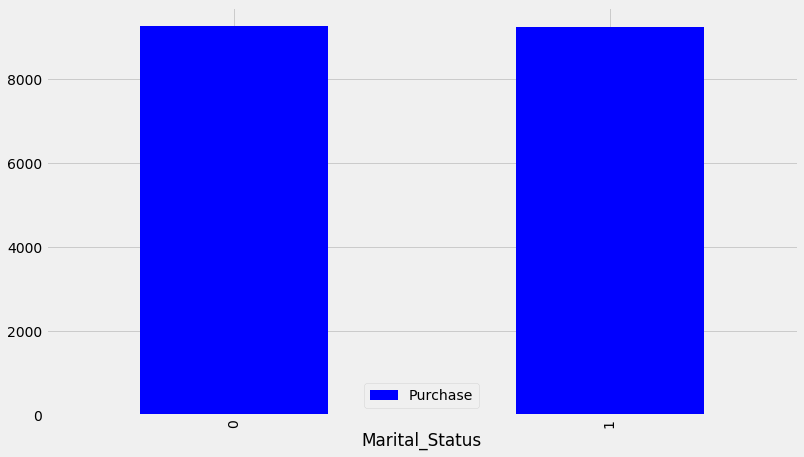

In [58]:
marital_status_pivot = train.pivot_table(index='Marital_Status',values='Purchase',aggfunc=np.mean)
marital_status_pivot.plot(kind = "bar",color = 'blue',figsize = (12,7))

In [63]:
train['source'] = 'train'
train.source
data = pd.concat([train,test],ignore_index=True,sort=False)
print(train.shape,test.shape,data.shape)

(550068, 13) (233599, 11) (783667, 13)


In [67]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                        29.808452
dtype: float64

In [69]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [70]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")

data["Product_Category_3"]= \
data["Product_Category_3"].fillna(-2.0).astype("float")

In [71]:
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "train")]
data = data.drop(condition)